# What Drives the Used Car Price?

## Overview

In this project, we will perform the Exploratory Data Analysis(EDA) to understand *what factors drives the used car price* and build predictive model to understand the weight of each variable. 

Finally we will provide the summary of our EDA findings and provide recommendations to Used Car Dealer business client team regarding what consumers value in a used car

Note : This is a UC Berkeley Haas AI/ML Certification Course Assignment

## Approach

In order to achieve objective, I will follow below **CRISP-DM** framework steps

1. **Business Understanding :** Define and understand the business problem (As defined in above section)
2. **Data Understanding :** Understand the used car input dataset distributions and derive statistical inferences
3. **Data Preparation :** 
    - Perform data cleaning techniques
    - Finalizing the feature list
4. **Exploratory Data Analysis(EDA) :** Perform the EDA on used car dataset
5. **Modeling :**
    - *Feature Engineering* :
        - Imputation for Missing numerical values
        - MinMaxScaler Tranformation
        - One-Hot Encoding of categorical features
        - Splitting into training and testing sets
    - *Predictive Modeling*
        - Apply Linear Regression and tree models like Decision Tree/Gradient Boosting/Random Forest
    - *Feature Selection* 
        - Recursive Feature Elimination (RFE) technique
6. **Evaluation :**
    - Evaluate model performance using MAE(Mean Absolute Error)/MSE(Mean Squared Error)/R2 Score
7. **Conclusion :**
    - Get the top feature weights from linear regression model and come up with business recommendation

## 1. Business Problem Statement
Used cars market is a large market and the car prices are often depends on multiple factors.

Goal is to understand what factors make a car more or less expensive. As a result of this analysis, we should provide clear recommendations to your client(a used car dealership) as to what consumers value in a used car?

### 1.1 Objective

Objectives of these projects are
- Peform thorough Exploratory Data Analysis(EDA) and summarize the business insights to `used car dealership business team`
- Apply multiple predictive ML models and choose the best performing predictive model
- Provide recommendations to client regarding what features consumers values most

### 1.2 Data Set
The original dataset contained information on *3 million* used cars. The provided dataset contains information on *426K* cars to ensure the speed of processing

- Number of input samples : 426,880
- Number of features : 17
- Target or dependent variable : price

Original Dataset : [Kaggle Used Car Dataset](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data)


## Libraries Used For This Analysis


In [1130]:
# For this analysis, we are going to use below libraries
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For feature engineering/pre processing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

# For modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Feature selection
from sklearn.feature_selection import RFE

# For model perf measurement
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

## Common Functions Used for EDA and Pre Processing

In [1133]:
# Functions to help with dataframe insights 
def null_values_per_column(df):
    '''
    List the null values count per column (This is useful to get raw na counts per column level)
    
    df: Input pandas dataframe
    
    returns
        the null values per column
    '''
    return df.isna().sum()


def null_values_pct_per_column(df):
    '''
    List % of null values count per column (This is useful understand over all na % per column)
    
    df: Input pandas dataframe
    
    returns
        the % of null values per column
    '''
    return (df.isna().sum() * 100)/len(df)

def get_cardinality_of_each_column(df):
    '''
    List the cardinality of each column 
    
    df: Input pandas dataframe
    
    returns
        disctionary of {column name} -> {it's corresponding distinct value count}
    '''
    column_cardinality_dict = {}
    for col in df.columns:
        column_cardinality_dict[col] = df[col].nunique()
    return column_cardinality_dict
        
    

def get_unique_feature_values(df, features):
    '''
    Gets the list of unique values per each given feature

    df: input pandas dataframe
    features: List of provided features
    
    returns: dictionary of feature vs it's unique values
    
    '''
    unique_feature_values = {}
    for feature in features:
        unique_feature_values[feature] = df[feature].unique()
    return unique_feature_values

# Data cleaning functions 
## filling with mode
def fill_missing_values_with_mode(df, features):
    '''
    Transoforms the input dataframe, by filling missing values of 
    each given feature column with their corresponding mode

    df: input pandas dataframe
    features: list of provided features

    returns: pandas dataframe by filling missing values with mode
    '''
    for feature in features:
        df[feature] = df[feature].fillna(df[feature].mode()[0])
    return df

def replace_with_first_n_digits(df, n, column_name):
    '''
    Replaces number column values with it's first n digits of column values

    df: input pandas dataframe
    column_name: numeric column name

    returns: dataframe with replaced column values
    '''
    df[column_name] = df[column_name].astype(int)
    df[column_name] = df[column_name].mod(n)
    return df

## 2. Understanding Data

In [1136]:
# read the data and input schema
raw_used_cars = pd.read_csv('../data/vehicles.csv')

In [1137]:
raw_used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [1140]:
raw_used_cars.shape

(426880, 18)

In [1142]:
# Sample Car
raw_used_cars.loc[100]

id                         7309192232
region                         auburn
price                           16590
year                           2015.0
manufacturer                  hyundai
model           sonata sport sedan 4d
condition                        good
cylinders                         NaN
fuel                              gas
odometer                      26655.0
title_status                    clean
transmission                    other
VIN                 5NPE34AF8FH021634
drive                             fwd
size                              NaN
type                            sedan
paint_color                     white
state                              al
Name: 100, dtype: object

In [1144]:
# na % per column
null_values_pct_per_column(raw_used_cars)

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

**Notes :**
- `condition`, `cylinders`, `VIN`, `drive` and `paint_color` features has almost 30-40% null values
- `size` feature has 71% of null values

In [1147]:
# cardinality of each column 
get_cardinality_of_each_column(raw_used_cars)

{'id': 426880,
 'region': 404,
 'price': 15655,
 'year': 114,
 'manufacturer': 42,
 'model': 29649,
 'condition': 6,
 'cylinders': 8,
 'fuel': 5,
 'odometer': 104870,
 'title_status': 6,
 'transmission': 3,
 'VIN': 118246,
 'drive': 3,
 'size': 4,
 'type': 13,
 'paint_color': 12,
 'state': 51}

**Note :**
- `region` and `model` categorical features has high cardinalities

In [1150]:
# For each of the below features which has null values, let's look into their other non null vaules
features_with_null_values = ['size', 'paint_color', 'drive', 'condition', 'type', 'model', 'cylinders','odometer','manufacturer', 'title_status', 'transmission']
get_unique_feature_values(raw_used_cars, features_with_null_values)

{'size': array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'],
       dtype=object),
 'paint_color': array([nan, 'white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
        'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object),
 'drive': array([nan, 'rwd', '4wd', 'fwd'], dtype=object),
 'condition': array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
       dtype=object),
 'type': array([nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
        'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
        'wagon'], dtype=object),
 'model': array([nan, 'sierra 1500 crew cab slt', 'silverado 1500', ...,
        'gand wagoneer', '96 Suburban', 'Paige Glenbrook Touring'],
       dtype=object),
 'cylinders': array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
        'other', '3 cylinders', '10 cylinders', '12 cylinders'],
       dtype=object),
 'odometer': array([    nan,  57923.,  71229., ..., 172511., 

## 3. Data Preparation

### 3.1 Data Cleaning Techniques(Missing Data Handling)

As we can see, input data is not complete and few of the key features have missing data. Before applying any ML model's we need to clean this input features.

So I am making following decisions to fill the missing data

#### Drop un necessary features
- `VIN` (not required)
- `state` (Assuming customer decisions remains same across all states in USA)
- `size` (This column is very important, but this feature has 70% null values and also just to note, this can be indirectly infered from type

#### Fill missing values with mode
- For 'drive', 'type','paint_color', 'condition', 'cylinders', 'title_status', 'fuel' features, fill the missing values with mode(most frequent feature value)

#### Drop samples 
- For essential features like `model and manufacturer`, where any derived value can mis lead, so dropping such samples

#### Forward filling of missing values
- Fill the `odometer` feature missing values with ffill() (Fills with previous non null values)


In [1154]:
# droping the below features
drop_features = ['size', 'VIN', 'state','id']
cleaned_data = raw_used_cars.drop(columns=drop_features)

print('features before clean up: {}'.format(raw_used_cars.shape[1]))
print('features after clean up: {}'.format(cleaned_data.shape[1]))

features before clean up: 18
features after clean up: 14


In [1156]:
# Filling missing values with their corresponding mode
features_to_fill_mode = ['drive', 'type','paint_color', 'condition', 'cylinders', 'title_status', 'fuel', 'transmission']
cleaned_data = fill_missing_values_with_mode(cleaned_data, features_to_fill_mode)


In [1158]:
# dropping samples where model or manufacturer are null
cleaned_data.dropna(subset=['model', 'manufacturer'], inplace=True)

In [1160]:
# Now only remaing feature with null values is `odometer`. So I am filling it with previous non value using ffill
cleaned_data['odometer'] = cleaned_data['odometer'].ffill()


In [1162]:
# Rounding few key feature values
# Fixing the price values and truncating them to first 5 digits
cleaned_data = replace_with_first_n_digits(cleaned_data, 100000, 'price')

# Fixing the odometer
cleaned_data = replace_with_first_n_digits(cleaned_data, 100000, 'odometer')

#### Now there is no other feature left with null values. Woo hoo ...


In [1165]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404026 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        404026 non-null  object 
 1   price         404026 non-null  int64  
 2   year          404020 non-null  float64
 3   manufacturer  404026 non-null  object 
 4   model         404026 non-null  object 
 5   condition     404026 non-null  object 
 6   cylinders     404026 non-null  object 
 7   fuel          404026 non-null  object 
 8   odometer      404026 non-null  int64  
 9   title_status  404026 non-null  object 
 10  transmission  404026 non-null  object 
 11  drive         404026 non-null  object 
 12  type          404026 non-null  object 
 13  paint_color   404026 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 46.2+ MB


#### Let's check the numerical fields distributions

In [1168]:
cleaned_data.describe()

,price,year,odometer
count,404026.000000,404020.000000,404026.000000
mean,17301.255142,2011.657180,43580.587428
std,14629.209005,8.570535,28778.852786
min,0.000000,1900.000000,0.000000
25%,5995.000000,2009.000000,19215.250000
50%,13991.000000,2014.000000,40000.000000
75%,26000.000000,2017.000000,67660.750000
max,99999.000000,2022.000000,99999.000000


#### Fixing the model user entered values

In [1171]:
cleaned_data.describe(include = ['object'])

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color
count,404026,404026,404026,404026,404026,404026,404026,404026,404026,404026,404026
unique,404,41,23747,6,8,5,6,3,3,13,12
top,columbus,ford,f-150,good,6 cylinders,gas,clean,automatic,4wd,sedan,white
freq,3402,70269,8009,279695,257143,343103,391532,322584,249250,168531,196053


In [1173]:
# As you can observe, for 41 manufactures, number of models seems to be very huge. This is due to UED data
# Ideal way to handle this is using clustering, but for now I am considering only first word from model. 
# So this reduced the cardinality, from 23K to 3K
cleaned_data['model'] = cleaned_data['model'].str.split(' ').str[0].str.lower()

# model names has `-` in it, for example few of the model names has f-150 and few f150. So fixing it
cleaned_data['model'] = cleaned_data['model'].str.replace('-', '')

## 4. Exploratory Data Analysis(EDA)
Let's deep dive into data insights


#### 4.1 Models per manufacturer

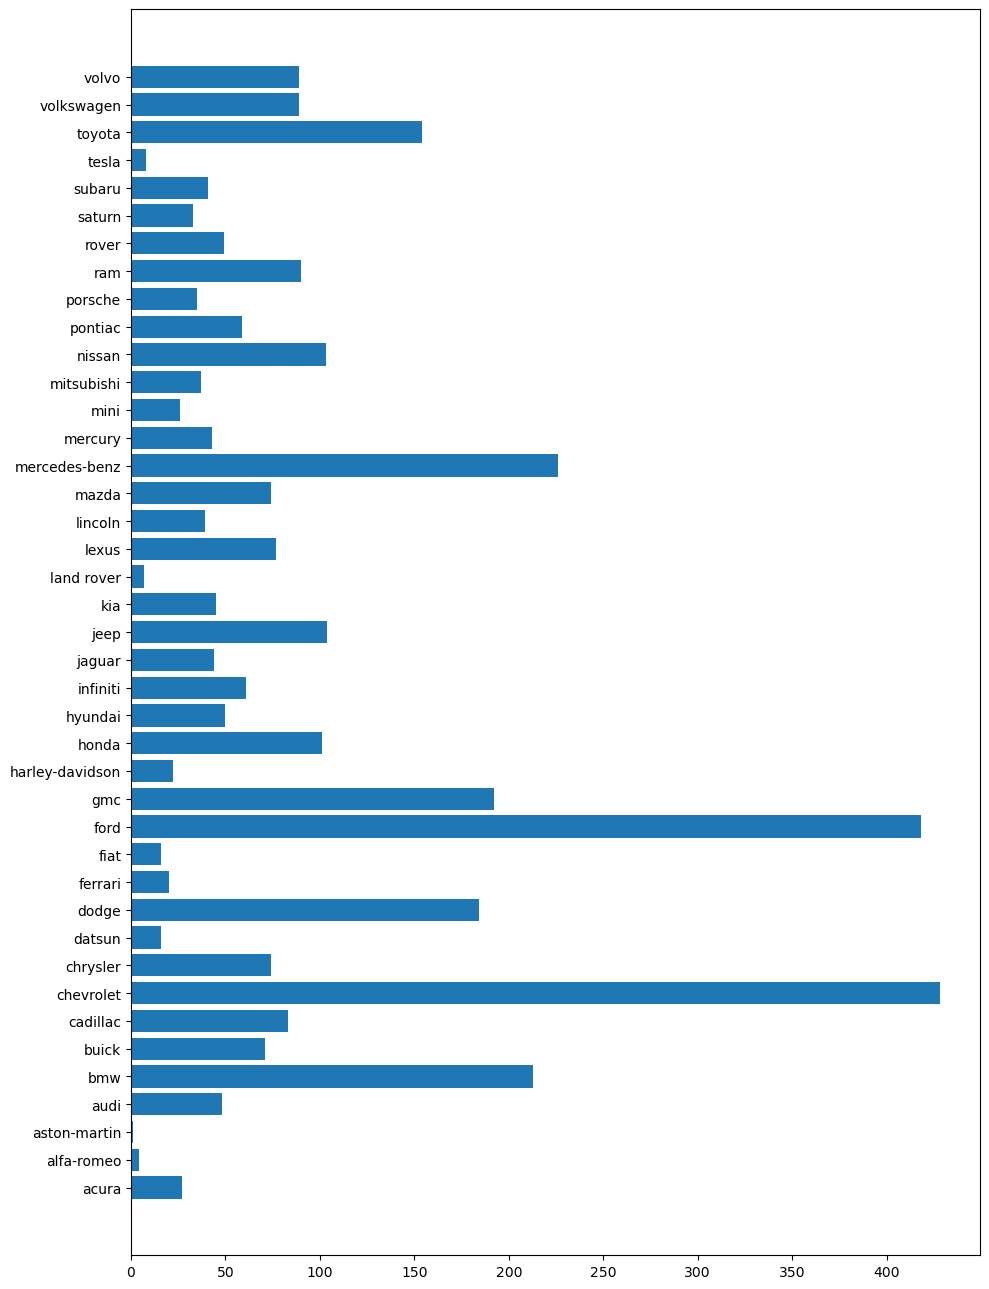

In [1177]:
# How many models per manufacturer
models_per_manufacturer = cleaned_data.groupby('manufacturer')['model'].nunique().to_dict()
fig, ax = plt.subplots(figsize=(10,13))
ax.barh(list(models_per_manufacturer.keys()), list(models_per_manufacturer.values()))
plt.tight_layout()
plt.savefig("../images/car_models_per_manufacturer.png")
plt.show()

#### 4.2 Price Distribution

<Figure size 400x200 with 0 Axes>

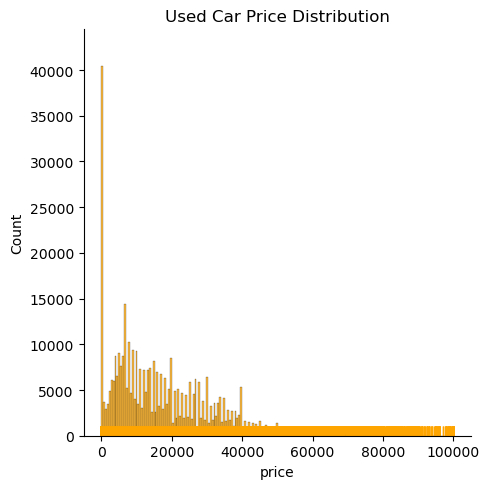

In [1180]:
plt.figure(figsize=(4,2))
sns.displot(cleaned_data.price, rug=True, color="orange")
plt.title('Used Car Price Distribution')
plt.tight_layout()
plt.savefig("../images/price_distribution.png")
plt.show()

**Note :** From the above price distribution chart
- Most of the car prices are < 20K and distribution is right skewed
- p50(median) is 14K
- Above 60K are outliers

#### 4.4 Distributions per Categorical Type

In [1183]:
categorical_data = cleaned_data.select_dtypes(include = 'object')
categorical_data.columns

Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'type', 'paint_color'],
      dtype='object')

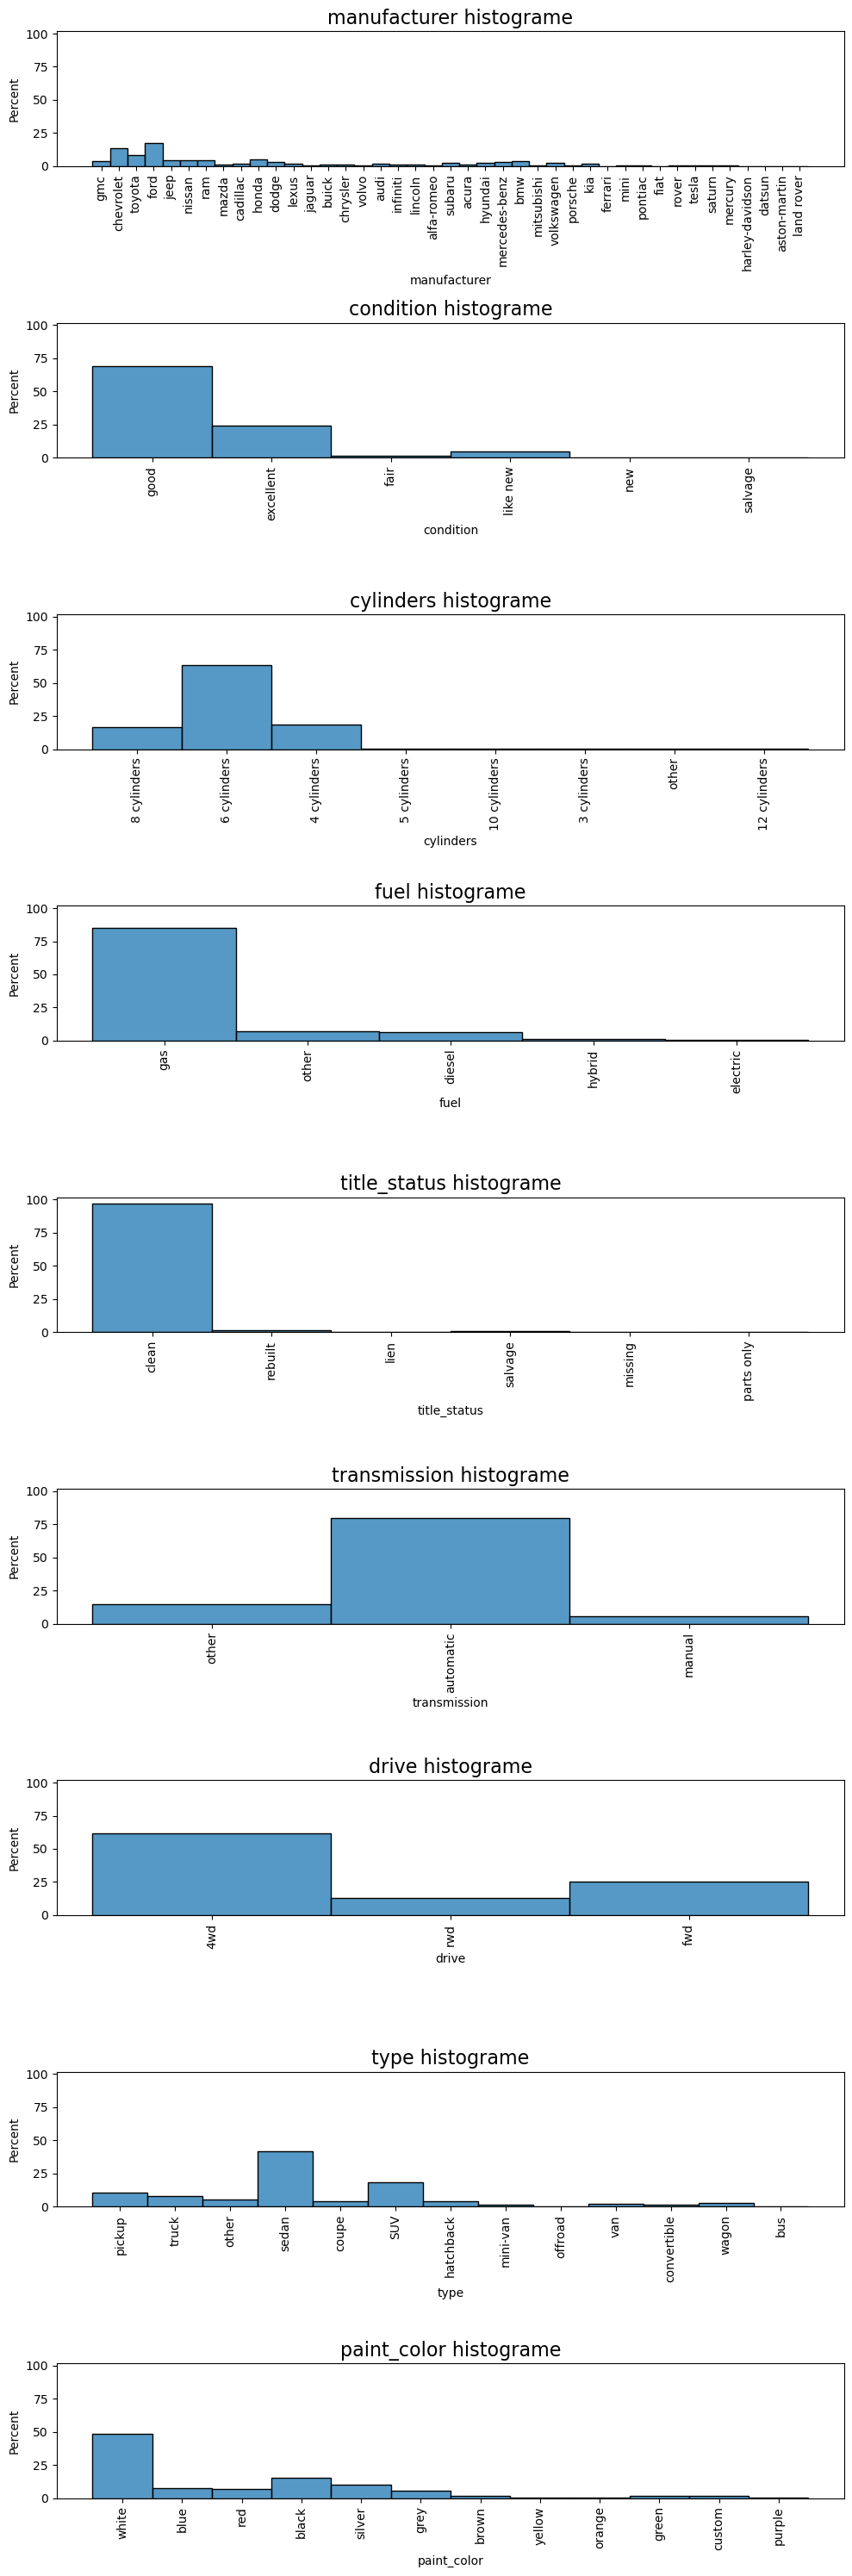

In [1185]:
categorical_columns = categorical_data.columns.tolist()

features_to_be_removed = ['region', 'model']
categorical_columns_for_plotting = [column for column in categorical_columns if column not in features_to_be_removed ]

fig, axes = plt.subplots(len(categorical_columns_for_plotting), 1, figsize=(10, 30), sharey=True)
for i, ax in enumerate(fig.axes):
    sns.histplot(ax=ax, x=cleaned_data[categorical_columns_for_plotting[i]], stat='percent')
    ax.set_title(f'{categorical_columns_for_plotting[i]} histograme', fontsize=16)
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig("../images/price_distribution_per_category.png")
plt.show()

#### 4.4.1 Categorical Feature Type Distribution Summary
*Observations:* From the above feature hist distributions

- Used cars market is dominated by Ford(20%), Chevrolet(15%), toyota(10%), honda(5%), gmc(3%) and bmw(2%) etc.,
- Condition of cars
    - 70% of the used cars are in good condition
    - 25% of them are in excellent condition
    - 5% of them almso new
- Cylinder type
    - 65% of them are cylinders
    - each of the 4 and 8 cyliders remaining % equally (which is almost 15% each)
- Fuel Type
    - 85% of them are gas
    - 5% of them diesel and remaining others like electric/hybrid (As electric is very less, so this shows the dataset is very old...)
- Title status
    - 95% of them have clean titles
- Transmission type
    - Almsot 80% of them are automatic
- Drive type
    - 60% of them are four wheel drive
    - 25% of them are fwd drive
- Type distribution
    - 40% of them are Sedan
    - 18% of them are SUV
- Color distribution (color might not contribute price value but it is definitely one of the purchase decision factor)
    - 50% of the white
    - 15% of them black

#### 4.5 Let's observe the price distribution per caterorical type

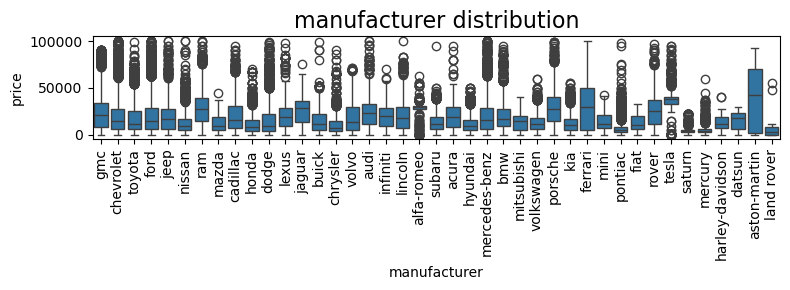

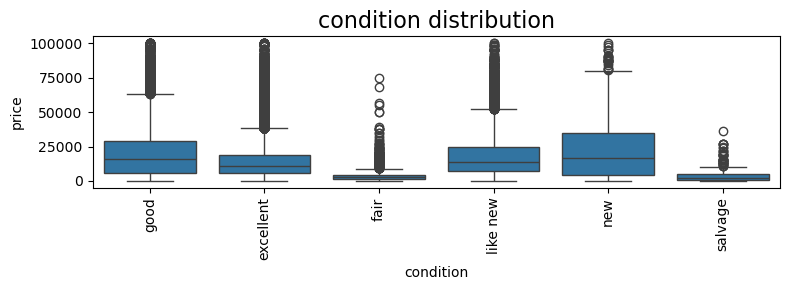

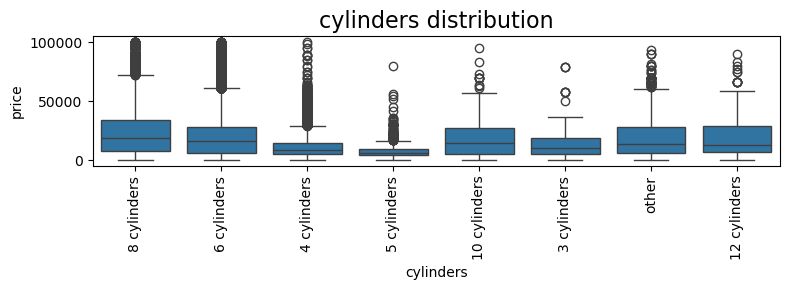

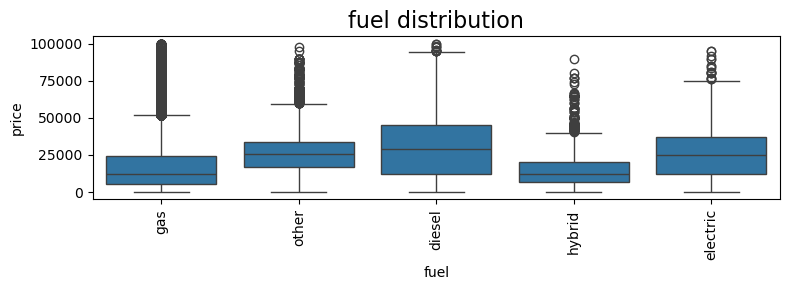

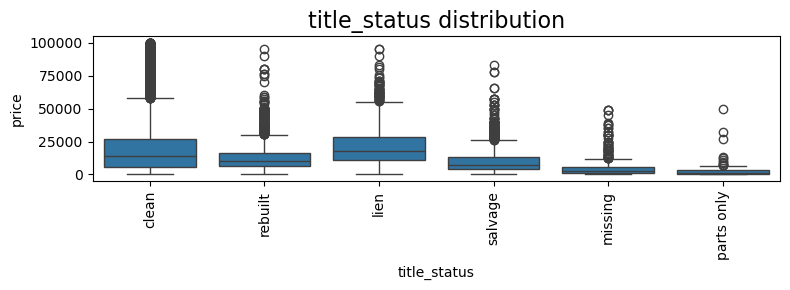

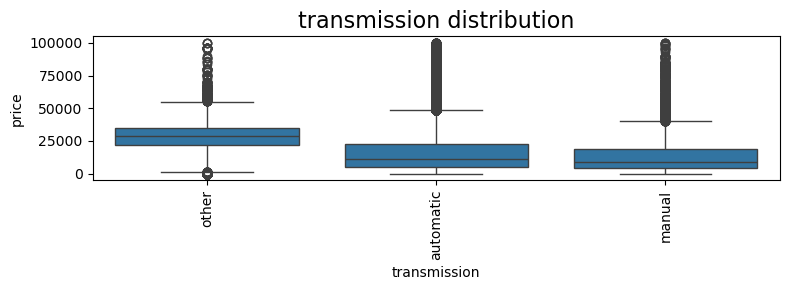

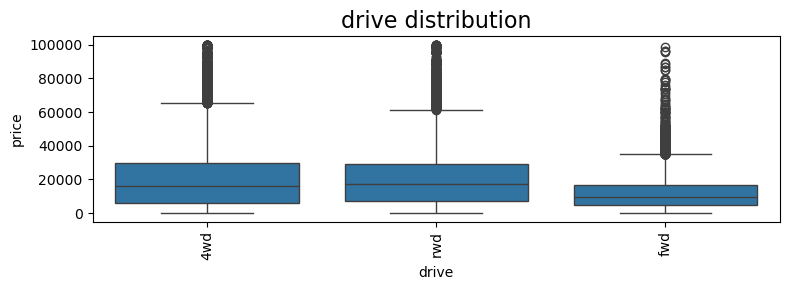

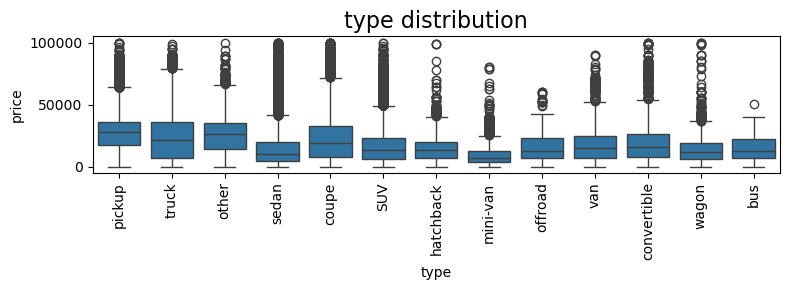

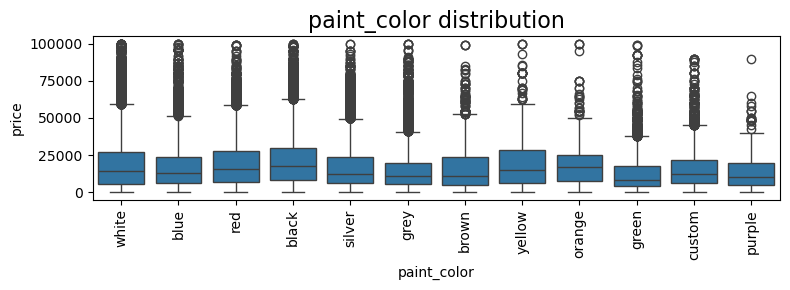

In [1189]:
# Let's check how each categorical type feature impacts price
for i, column in enumerate(categorical_columns_for_plotting):
    plt.figure(figsize=(8, 3))
    sns.boxplot(x= cleaned_data[column], y = cleaned_data['price'], patch_artist=True)
    plt.title(f'{column} distribution', fontsize=16)
    plt.xlabel(f'{column}')
    plt.ylabel('price')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(f"../images/price_distribution_per_{column}_category.png")
    plt.show()

#### 4.5.1 Categorical type features impact on price Observations****
- prices by brands
    - `aston-martin` brand has highest price
    - just to note, used `electric` vehicles like `tesla` has high price
    - `land-rover` has least used car price
- prices by condition
    - `good` and `new` condition has high prices
    - `fair` and `salvage` conditioned used vehicles has least prices
- prices by cyliders
    - Seems highly demanded types like `8/6` cylider types has more price than `10/12` cylinders
- prices by fuel types
    - `diesel` and `electic` fuel types has higher prices than `gas` fuel type
- prices by title status
    - `clean` and `lien` status used cars has more price
    - `missing/salvage` and `parts only` statuses has less price
- prices by transmission type
    - `other` transmission type has higher price, but unfortunately we don't have further details on other types, most likely it might be electric cars
    - `automatic` pricier than `manual`
- prices by type
    - `pickup/truck/coupe` types has higher prices
    - `mini-vans` has lowest price
- prices by car paint color
    - seems paint color is not determining the car price. So better to drop this feature


#### 4.6 Finalized categorical features

Based on above observations from distributions, finalizing the below set of features which has impact on `price`
- manufacturer
- condition
- cylinders
- fuel
- title_status
- transmission
- drive
- type

In [1193]:
# Dropping few of the un nesessary features
cleaned_data = cleaned_data.drop(columns=['region', 'paint_color', 'model'], axis=1)
finalized_categorical_features = cleaned_data.select_dtypes(include = 'object').columns.tolist()
finalized_categorical_features

['manufacturer',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'type']

### 4.6 Numerical Type Features impact on price

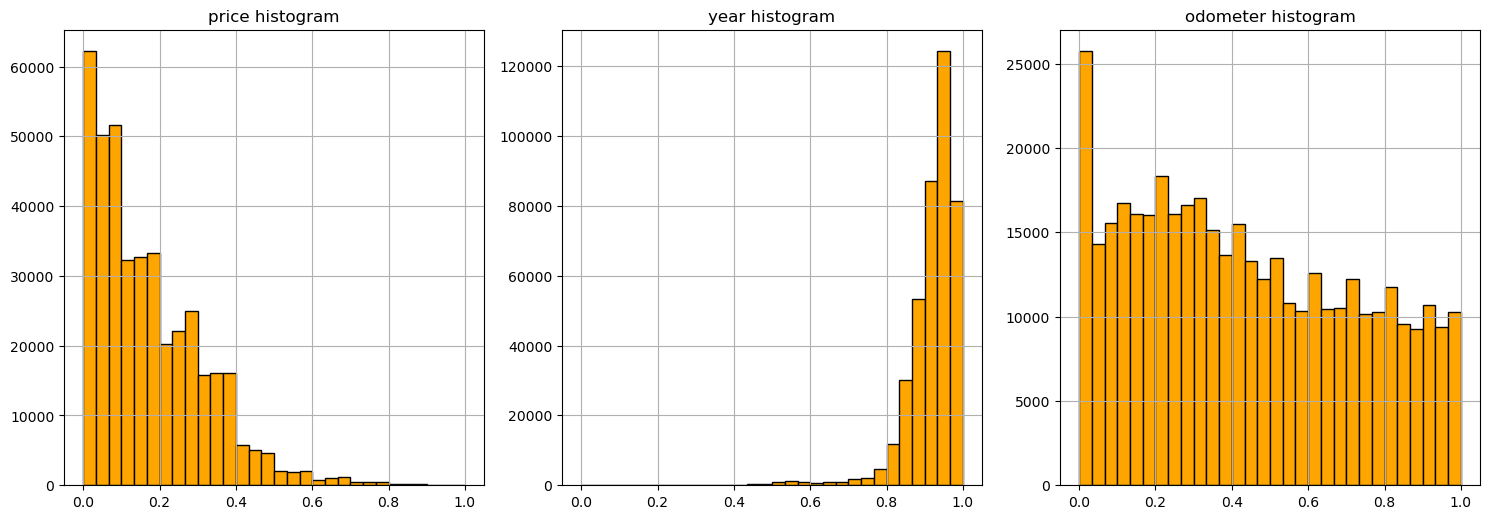

In [1195]:
numerical_data = cleaned_encoded_data.select_dtypes(include=['float64', 'int64'])

# Histograms for numerical features
numerical_columns = numerical_data.columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)  
    numerical_data[col].hist(bins=30, color='orange', edgecolor='black')
    plt.title(f'{col} histogram')
plt.tight_layout()
plt.savefig(f"../images/price_distribution_per_numeric_type.png")
plt.show()

#### 4.6.1 Observations from numerical feature distributions

- Odometer is evenly distributed, just to note there are good number with < 5K odometer value
- most of the cars from 2015-2020 make year
- As we observed most of the used car prices are < 40K

### 4.7 correlation analysis

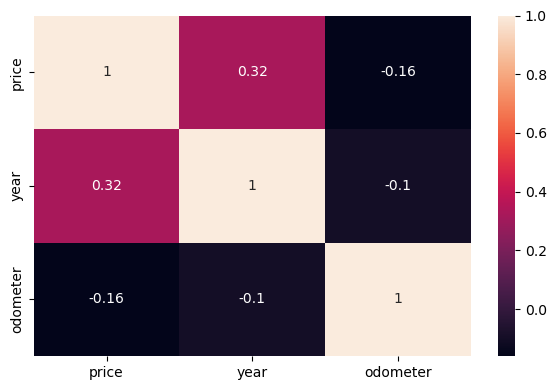

In [1201]:
plt.figure(figsize = (6,4))

sns.heatmap(numerical_data.corr(), annot = True)
plt.tight_layout()
plt.savefig(f"../images/numerical_features_correletion.png")
plt.show()

**Observations** from numerical fearures impact on price

- As we can see both year and odometer has correlation with price
- Latest year has more price
- Where as higher odometer feature value will have -ve impact on price

## 5 Modeling

Below are the final finalized features for modeling 
- manufacturer
- condition
- cylinders
- fuel
- title_status
- transmission
- drive
- type
- year
- odometer

### 5.1 Feature Engineering 

#### 5.1.1 One-hot Encoding of Categorical Types

In [1207]:
# One-Hot Encoding of categorical features
cleaned_encoded_data = pd.get_dummies(cleaned_data, columns=finalized_categorical_features, drop_first=True)
cleaned_encoded_data.head(2)

,price,year,odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
27,33590,2014.0,57923,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
28,22590,2010.0,71229,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


In [1209]:
cleaned_encoded_data.shape

(404026, 80)

#### 5.1.2 Applying Transformations for Normalizing Numerical Features and hanlding missing value imputations

##### 5.1.2.1 Imputation for Missing numerical values

In [1213]:
#cleaned_encoded_data = cleaned_encoded_data.reset_index()
# Identify numerical columns, excluding the target variable 'price'
numerical_feature_cols = cleaned_encoded_data.select_dtypes(include=['float64', 'int64']).columns.drop('price')
print(numerical_feature_cols)

mean_imputater = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cleaned_encoded_data[numerical_feature_cols] = mean_imputater.fit_transform(cleaned_encoded_data[numerical_feature_cols])

Index(['year', 'odometer'], dtype='object')


#### 5.1.3 MinMaxScaler Tranformation

In [1216]:
# Initialize the scaler
scaler = MinMaxScaler()
all_numerical_columns = cleaned_encoded_data.select_dtypes(include=['float64', 'int64']).columns
cleaned_encoded_data[all_numerical_columns] = scaler.fit_transform(cleaned_encoded_data[all_numerical_columns])
cleaned_encoded_data.isnull().sum()

price                        0
year                         0
odometer                     0
manufacturer_alfa-romeo      0
manufacturer_aston-martin    0
                            ..
type_pickup                  0
type_sedan                   0
type_truck                   0
type_van                     0
type_wagon                   0
Length: 80, dtype: int64

In [1218]:
cleaned_encoded_data.head(2)

,price,year,odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
27,0.335903,0.934426,0.579236,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
28,0.225902,0.901639,0.712297,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


### 5.2 Price Predction Modeling

#### 5.2.1 Common functions used in for prediciton modeling

In [1240]:
def execute_models(X_train, y_train, X_test, y_test,  models):
    '''
    X_train : training dataset with independent features
    y_train : training dataset with target/depedent variable
    X_test : testing dataset with independent features
    y_test: testing dataset with target/depedent variable

    returns:
      model performance metrics including MAE/MSE/R2 Scores
      Linear regression coeficients and intercepts
    
    '''
    model_perf_results_metrics = {}
    coeficients_intercepts = {}

    # Train and predict each model and capture the results
    for model_name, model in models.items():
        # Training the model
        model.fit(X_train, y_train)
    
        # Predictions on the test set
        y_pred = model.predict(X_test)
    
        # Model performance
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2score = r2_score(y_test, y_pred)

        if model_name == 'Linear Regression':
            coeficients = model.coef_
            intercepts = model.intercept_
            coeficients_intercepts["coeficients"] = {
                "coeficients": coeficients 
            }
            coeficients_intercepts["intercepts"] = {
                "intercepts": intercepts
            }
            
        model_perf_results_metrics[model_name] = {
            "MAE": f"{mae:.6f}",
            "MSE": f"{mse:.6f}",
            "R-squared": f"{r2score:.6f}"
        }
        
        
    return (model_perf_results_metrics, coeficients_intercepts)

#### 5.2.2 Defining dependent and independent variables

In [1225]:
X = cleaned_encoded_data.drop(columns=['price']) 
y = cleaned_encoded_data['price']

#### 5.2.3 Splitting into training and testing sets

In [1228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(f'Training dataset shape : {X_train.shape}],\nTesting dataset shape: {X_test.shape}')

Training dataset shape : (282818, 79)],
Testing dataset shape: (121208, 79)


#### 5.2.4 Initialize the list of prediction modles 

In [1231]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

#### 5.2.5 Executing the models

In [1234]:
(model_perf_results_metrics, coeficients_intercepts) = execute_models(X_train, y_train, X_test, y_test, models)

## 6 Model Performance Results Comparison

In [1236]:
model_perf_results_df = pd.DataFrame(model_perf_results_metrics).T
print(f"Model Performance Results: \n{model_perf_results_df}")

Model Performance Results: 
                        MAE       MSE R-squared
Linear Regression  0.083517  0.013908  0.350515
Decision Tree      0.037033  0.007729  0.639086
Gradient Boosting  0.067673  0.010657  0.502349
Random Forest      0.034097  0.005117  0.761068


***Observations***

- Based on both MAE and MSE metrics, Radom Forest beats remaining all the models

## 7 Results
To recommend business regarding each feature weightage, let's capture the feature coeficients
- For simplicity, going to use RFE for top 30 feature selection
- Then based on Linear Regression coefficient and intercept, going to provide high level price calculation formulae

### 7.1 Recursive Feature Elimination (RFE) technique

To recommend business regarding each feature weightage, let's capture the feature coeficients
- For simplicity, going to use RFE for top 30 feature selection
- Then based on Linear Regression coefficient and intercept, going to provide high level price calculation formulae

In [1244]:
# Importing RFE and LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
rfe = RFE(lr, n_features_to_select=30)
rfe = rfe.fit(X_train, y_train)

In [1245]:
# List of columns selected by RFE technique
rfe_selected_columns = X_train.columns[rfe.support_].tolist()
rfe_selected_columns

['year',
 'odometer',
 'manufacturer_aston-martin',
 'manufacturer_datsun',
 'manufacturer_ferrari',
 'manufacturer_fiat',
 'manufacturer_harley-davidson',
 'manufacturer_jaguar',
 'manufacturer_mitsubishi',
 'manufacturer_porsche',
 'manufacturer_rover',
 'manufacturer_saturn',
 'manufacturer_tesla',
 'condition_fair',
 'condition_new',
 'condition_salvage',
 'cylinders_12 cylinders',
 'fuel_electric',
 'fuel_gas',
 'fuel_hybrid',
 'fuel_other',
 'title_status_parts only',
 'title_status_salvage',
 'transmission_other',
 'drive_fwd',
 'type_convertible',
 'type_coupe',
 'type_offroad',
 'type_pickup',
 'type_truck']

In [1246]:
print(f'Before RFE X_train shape : {X_train.shape}')
print(f'Before RFE X_test shape : {X_test.shape}')
X_train1 = X_train[rfe_selected_columns]
X_test1 = X_test[rfe_selected_columns]
print(f'After RFE X_train shape : {X_train1.shape}')
print(f'After RFE X_test shape : {X_test1.shape}')

Before RFE X_train shape : (282818, 79)
Before RFE X_test shape : (121208, 79)
After RFE X_train shape : (282818, 30)
After RFE X_test shape : (121208, 30)


In [1250]:
# Let's check the model perf with RFE selctected features
(model_perf_results_metrics, coeficients_intercepts) = execute_models(X_train1, y_train, X_test1, y_test, models)
coeficients_intercepts_df = pd.DataFrame(coeficients_intercepts).T
print(f'linear regression coeficients: \n{coeficients_intercepts_df}')

linear regression coeficients: 
                                                   coeficients intercepts
coeficients  [0.5593191342676174, -0.04580278171166696, 0.2...        NaN
intercepts                                                 NaN  -0.227682


In [1251]:
print(coeficients_intercepts_df['coeficients']['coeficients'])

[ 0.55931913 -0.04580278  0.23286784  0.16170554  0.18000148 -0.04959977
 -0.05763249  0.04849474 -0.05024742  0.12334813  0.08035296 -0.05414888
  0.15724408 -0.0640879   0.05084771 -0.05067545  0.05426712 -0.12015864
 -0.11289181 -0.11001492 -0.09254516 -0.04653593 -0.04475018  0.08047179
 -0.05634146  0.06762729  0.05709189  0.05892087  0.07360194  0.05394373]


### 7.2 Let's define the price in terms of feature weightage

In [1255]:
weighted_features = [ f'({coeficients_intercepts_df['coeficients']['coeficients'][i]} * {rfe_selected_columns[i]})' for i in range(len(rfe_selected_columns))]
lr_coeif_eqn = '+'.join(weighted_features)
lr_eqn = f'{lr_coeif_eqn} {coeficients_intercepts_df['intercepts']['intercepts']}'

### 7.3 Result Summary

Based on top 30 RFE feature selections, price can be predicted using below formula


In [1261]:
print(f'price={lr_eqn}')

price=(0.5593191342676174 * year)+(-0.04580278171166696 * odometer)+(0.23286783697348823 * manufacturer_aston-martin)+(0.16170553567797954 * manufacturer_datsun)+(0.18000147572989625 * manufacturer_ferrari)+(-0.04959977043713948 * manufacturer_fiat)+(-0.05763248574376456 * manufacturer_harley-davidson)+(0.0484947385163485 * manufacturer_jaguar)+(-0.05024742173323153 * manufacturer_mitsubishi)+(0.12334812886476328 * manufacturer_porsche)+(0.08035296426518912 * manufacturer_rover)+(-0.05414888364979748 * manufacturer_saturn)+(0.15724408370366497 * manufacturer_tesla)+(-0.06408789940295635 * condition_fair)+(0.05084770632344341 * condition_new)+(-0.050675450879457254 * condition_salvage)+(0.05426712198366653 * cylinders_12 cylinders)+(-0.12015863939331674 * fuel_electric)+(-0.11289180558746861 * fuel_gas)+(-0.11001491529548413 * fuel_hybrid)+(-0.0925451600648397 * fuel_other)+(-0.04653593220476024 * title_status_parts only)+(-0.04475017977185019 * title_status_salvage)+(0.0804717904508551

## 8 Future Work

- Explore clustering techniques to pre process model feature and reduce it's cardinality
- Apply Hyperparameter tuning by using GridSearchCV techniques to achieve efficient predictive model

## 9 Conclusion

As we can observe, consumer values below features 
- Car's model year : Values latest year
- Odometer : The lesser odometer, pays more
- Car manufacturer : Type of manufacturer matters
- Car condition : new condition is valued more
- car title : Values clear title

Also as provided in results section, used car price can be calculated using predictive model